## Image Quantization

Image Quantization is a technique to compress image from continuous values to discrete values. It's a lossy compression and reduces the file size significantly. 

We can use KMeans clustering to compress the image. We'll convert RGB values that range from 0 - 255 to 5  values only. And convert the image from RGB to one with only 5 colors. 

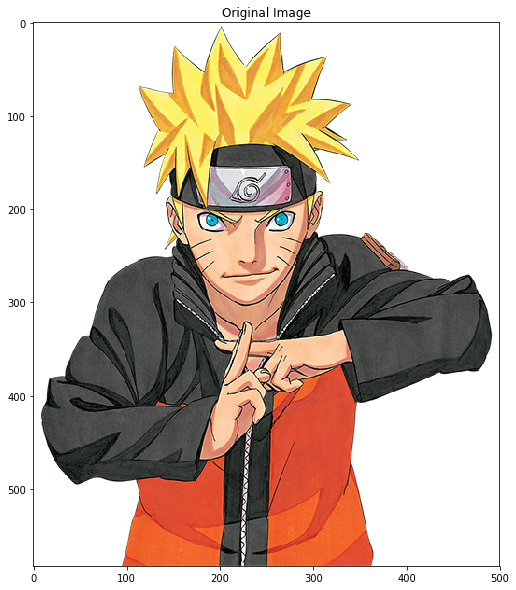

In [29]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(14, 10))
image = plt.imread("naruto.png")
plt.title("Original Image")
plt.imshow(image)
plt.show()

In [30]:
# Original image has three dimesntions one for each R, G, and B. 
# We'll convert it into 2D by reducing one dimension
x, y, z = image.shape
image = image.reshape(x*y, z)
image.shape

(291500, 4)

In [14]:
from sklearn.cluster import KMeans

clf = KMeans(n_clusters=5)
clf.fit(image)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Now the cluster_centers_ will represent 5 different colors. We'll use the same colors to represent the entire image. Using the labels_ array, which will classify every pixel and assign a cluster, we can index the cluster\_centers\_ array which has cluster colors. 

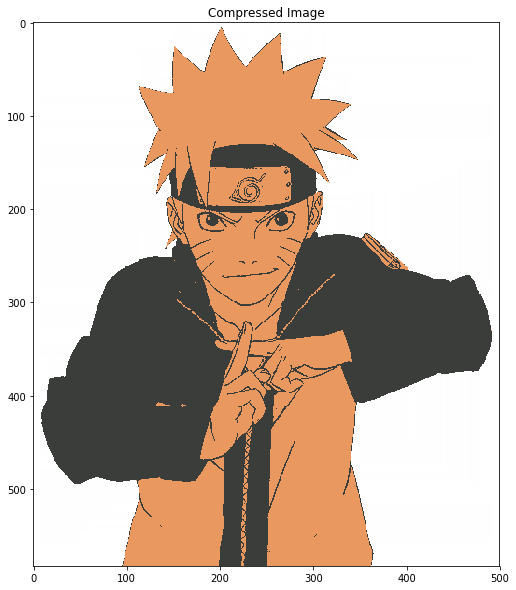

In [31]:
centers = clf.cluster_centers_
labels = clf.labels_
fig = plt.figure(figsize=(14, 10))
plt.title("Compressed Image")
plt.imshow(centers[labels].reshape(x, y, z))
plt.show()